# 손실함수(Loss_Function)
- 개념 알아보기 위한 코드 작성
- 실제로는 TensorFlow 활용

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 실제 값 (정답)
y = np.array([0, 1, 0, 0]) 

# 예측 값
yhat1 = np.array([0.1, 0.7, 0.2, 0]) # 예측 1
yhat2 = np.array([0.1, 0.2, 0.7, 0]) # 예측 2

N = y.size

### 평균 제곱 오차 (MSE: Mean Squared Error)
- `np.sum(np.square())`

In [8]:
mse1 = np.sum(np.square(yhat1 - y)) / N
mse2 = np.sum(np.square(yhat2 - y)) / N

mse1, mse2

(0.03500000000000001, 0.28500000000000003)

### 평균 제곱근 오차(RMSE: Root Mean Squared Error)
- `np.sqrt(MSE)` = `np.sqrt(np.sum(np.square()))` 

In [9]:
# root 씌우면 값이 더 커짐 
rmse1 = np.sqrt(mse1)
rmse2 = np.sqrt(mse2)

rmse1, rmse2

(0.18708286933869708, 0.5338539126015656)

### 평균 절대 오차 (MAE: Mean Absolute Error)

In [11]:
mae1 = np.sum(np.abs(yhat1 - y)) / N
mae2 = np.sum(np.abs(yhat2 - y)) / N

mae1, mae2

(0.15000000000000002, 0.4)

### Categorical Cross Entropy

In [14]:
def cross_entropy_error(yhat, ytrue):
  # yhat, ytrue 차원 변경 
  # 1차원 -> 2차원
  if yhat.ndim ==1: 
    yhat = yhat.reshape(1, -1)
    ytrue = ytrue.reshape(1, -1)

  if yhat.size == ytrue.size:
    ytrue = ytrue.argmax(axis=1) # argmax: 최대값 위치 반환 
  
  batch_size = yhat.shape[0]

  return -np.sum(np.log(yhat[np.arange(batch_size), ytrue])) / batch_size

In [15]:
cce1 = cross_entropy_error(yhat1, y)
cce2 = cross_entropy_error(yhat2, y)

cce1, cce2

(0.35667494393873245, 1.6094379124341003)

### Binary Cross Entropy

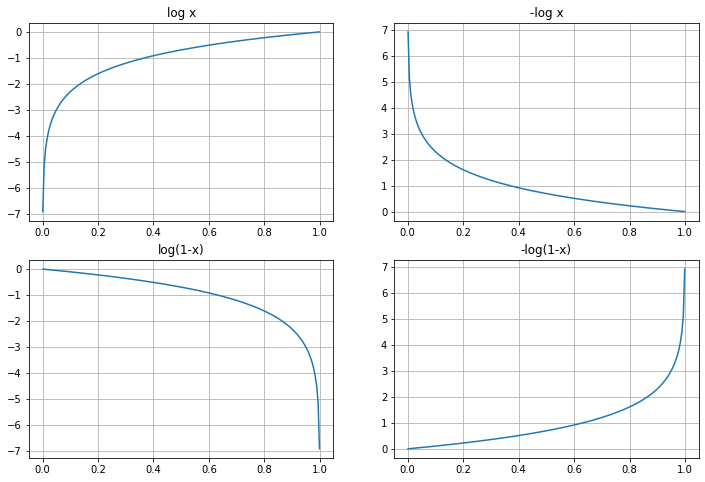

In [18]:
# log 차트 그려보기 

xs = np.linspace(0.001, 0.999, 200) # 임의의 값

plt.figure(figsize = (12, 8))

# log x
plt.subplot(221)
plt.plot(xs, np.log(xs)), plt.title('log x'), plt.grid()
# - log x
plt.subplot(222)
plt.plot(xs, -np.log(xs)), plt.title('-log x'), plt.grid()
# log(1-x)
plt.subplot(223)
plt.plot(xs, np.log(1-xs)), plt.title('log(1-x)'), plt.grid()
# -log(1-x)
plt.subplot(224)
plt.plot(xs, - np.log(1-xs)), plt.title('-log(1-x)'), plt.grid()

plt.show()

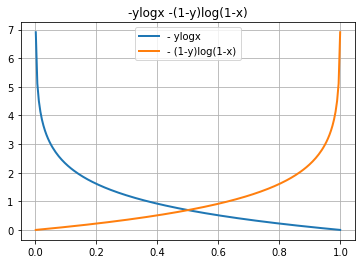

In [21]:
# -ylogx -(1-y)log(1-x)
plt.plot(xs, -np.log(xs), lw=2, label='- ylogx' )           # y = 1 경우
plt.plot(xs, -np.log(1-xs), lw=2, label='- (1-y)log(1-x)' ) # y = 0 경우

plt.title('-ylogx -(1-y)log(1-x)')
plt.grid(), plt.legend()
plt.show()

# y=1 경우 파란색 / y=0 경우 주황색